In [1]:
%matplotlib inline

import numpy as np
from importlib import reload
import scipy.misc
from matplotlib import pyplot as plt
from IPython.display import Latex
from IPython.display import display

In [2]:
import task1.task1 as task1
import task2.task2 as task2
import task3.task3 as task3
import task4.task4 as task4
import task5.task5 as task5
import task6.task6 as task6
import task7.task7 as task7
import task8.task8 as task8

In [19]:
def run_experiment(task):
    eps = 1e-5
    has_non_vect = hasattr(task, 'non_vectorized')
    table = "\\begin{array}{|c|c|c|c|c|}\n"
    table += "\\hline\n"
    table += "\\# & описание~данных & "
    table += "\\begin{subarray}{c} векторизованный\\\\вариант \\end{subarray} & "
    if has_non_vect:
        table += "\\begin{subarray}{c} вариант \\\\ без~векторизации \\end{subarray} & "
    else:
        table += "\\begin{subarray}{c} стандратный~вариант\\\\ scipy \\end{subarray} & "
    table += "\\begin{subarray}{c} альтернативный \\\\ вариант \\end{subarray} \\\\\n"   
    fmt = "{0:.3f}"
    
    reload(task)
    exp = task.make_experiment()
    global vectorized, non_vectorized, alternative, data
    vectorized = task.vectorized
    if has_non_vect:
        non_vectorized = task.non_vectorized
    else:
        non_vectorized = task.scipy_standart
    alternative = task.alternative
    for i in range(len(exp[0])):                
        print('Data #' + str(i + 1) + ': ' + exp[1][i])
        data = exp[0][i]
    
        
        print('Vectorized:')        
        v_res = vectorized(*data)
        v_t = %timeit -o vectorized(*data)    
        
        if has_non_vect:
            print('Non vectorized:')
        else:
            print('Scipy standart:')
        nv_res = non_vectorized(*data)
        nv_t = %timeit -o non_vectorized(*data)    
        
        print('Alternative:')
        a_res = alternative(*data)        
        a_t = %timeit -o alternative(*data)        

        
        if isinstance(v_res, tuple):
            np.testing.assert_allclose(v_res[0], nv_res[0], atol=eps, rtol=0)            
            np.testing.assert_allclose(a_res[0], nv_res[0], atol=eps, rtol=0)
            np.testing.assert_allclose(v_res[1], nv_res[1], atol=eps, rtol=0)
            np.testing.assert_allclose(a_res[1], nv_res[1], atol=eps, rtol=0)
            error = np.max(np.abs(v_res[0] - nv_res[0]))
            error = max(error, np.max(np.abs(a_res[0] - nv_res[0])))            
            error = max(error, np.max(np.abs(v_res[1] - nv_res[1])))            
            error = max(error, np.max(np.abs(a_res[1] - nv_res[1])))
            equal = np.all(v_res[0] == nv_res[0]) and np.all(v_res[0] == a_res[0])
            equal = equal and np.all(v_res[1] == nv_res[1]) and np.all(v_res[1] == a_res[1])
        else:
            np.testing.assert_allclose(v_res, nv_res, atol=eps, rtol=0)
            np.testing.assert_allclose(a_res, nv_res, atol=eps, rtol=0)
            error = np.max(np.abs(v_res - nv_res))        
            error = max(error, np.max(np.abs(a_res - nv_res)))
            equal = np.all(v_res == nv_res) and np.all(v_res == a_res)
        
        print('Error: ', error)
        print('Equal: ', equal)
        print('\n')                
            
        table += "\\hline\n"
        table += str(i + 1) +  " & "
        table += "\\text{" + exp[1][i] + "} & "
        table += fmt.format(v_t.best * 1000.0) + " & "
        table += fmt.format(nv_t.best * 1000.0) + " & " 
        table += fmt.format(a_t.best * 1000.0) + "\\\\\n"
        
        
    table += "\\hline\n"
    table += "\\end{array}\n"    
    display(Latex(table))

## Задача №1

In [4]:
run_experiment(task1)

Data #1: msize=(20, 30)
Vectorized:
100000 loops, best of 3: 19 µs per loop
Non vectorized:
10000 loops, best of 3: 23.4 µs per loop
Alternative:
10000 loops, best of 3: 28.5 µs per loop
Error:  0.0
Equal:  True


Data #2: msize=(400, 400)
Vectorized:
10000 loops, best of 3: 31.5 µs per loop
Non vectorized:
1000 loops, best of 3: 416 µs per loop
Alternative:
10000 loops, best of 3: 39.7 µs per loop
Error:  0.0
Equal:  True


Data #3: msize=(800, 600)
Vectorized:
10000 loops, best of 3: 38.3 µs per loop
Non vectorized:
1000 loops, best of 3: 645 µs per loop
Alternative:
10000 loops, best of 3: 42.4 µs per loop
Error:  0.0
Equal:  True


Data #4: msize=(1500, 1500)
Vectorized:
10000 loops, best of 3: 71.4 µs per loop
Non vectorized:
1000 loops, best of 3: 1.67 ms per loop
Alternative:
10000 loops, best of 3: 64.1 µs per loop
Error:  0.0
Equal:  True




<IPython.core.display.Latex object>

## Задача №2

In [5]:
run_experiment(task2)

Data #1: msize=(50, 50), n=100
Vectorized:
The slowest run took 5.34 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 5.64 µs per loop
Non vectorized:
10000 loops, best of 3: 141 µs per loop
Alternative:
10000 loops, best of 3: 155 µs per loop
Error:  0.0
Equal:  True


Data #2: msize=(500, 750), n=1000
Vectorized:
10000 loops, best of 3: 19.5 µs per loop
Non vectorized:
1000 loops, best of 3: 1.69 ms per loop
Alternative:
100 loops, best of 3: 1.63 ms per loop
Error:  0.0
Equal:  True


Data #3: msize=(8000, 4000), n=8000
Vectorized:
1000 loops, best of 3: 369 µs per loop
Non vectorized:
10 loops, best of 3: 20.7 ms per loop
Alternative:
10 loops, best of 3: 20.8 ms per loop
Error:  0.0
Equal:  True




<IPython.core.display.Latex object>

## Задача №3

In [6]:
run_experiment(task3)

Data #1: n=10000
Vectorized:
100 loops, best of 3: 1.79 ms per loop
Non vectorized:
10 loops, best of 3: 18.6 ms per loop
Alternative:
100 loops, best of 3: 1.98 ms per loop
Error:  False
Equal:  True


Data #2: n=100000
Vectorized:
10 loops, best of 3: 18.8 ms per loop
Non vectorized:
1 loops, best of 3: 191 ms per loop
Alternative:
10 loops, best of 3: 20.2 ms per loop

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:59: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:60: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:59: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.



Error:  False
Equal:  True


Data #3: n=1000000
Vectorized:
1 loops, best of 3: 217 ms per loop
Non vectorized:
1 loops, best of 3: 2.45 s per loop
Alternative:
1 loops, best of 3: 231 ms per loop

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:60: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:59: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.



Error:  False
Equal:  True


Data #4: n=10000000
Vectorized:
1 loops, best of 3: 2.57 s per loop
Non vectorized:
1 loops, best of 3: 29.9 s per loop
Alternative:
1 loops, best of 3: 2.77 s per loop

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:60: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:59: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.



Error:  False
Equal:  True




/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:60: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


<IPython.core.display.Latex object>

## Задача №4

In [7]:
run_experiment(task4)

Data #1: n=100000
Vectorized:
1000 loops, best of 3: 1.43 ms per loop
Non vectorized:
10 loops, best of 3: 74 ms per loop
Alternative:
10 loops, best of 3: 22.2 ms per loop
Error:  0
Equal:  True


Data #2: n=1000000
Vectorized:
100 loops, best of 3: 16 ms per loop
Non vectorized:
1 loops, best of 3: 739 ms per loop
Alternative:
1 loops, best of 3: 224 ms per loop
Error:  0
Equal:  True


Data #3: n=10000000
Vectorized:
10 loops, best of 3: 168 ms per loop
Non vectorized:
1 loops, best of 3: 7.38 s per loop
Alternative:
1 loops, best of 3: 2.25 s per loop
Error:  0
Equal:  True




<IPython.core.display.Latex object>

## Задача №5

In [8]:
run_experiment(task5)

Data #1: imsize=(100, 100, 5)
Vectorized:
1000 loops, best of 3: 536 µs per loop
Non vectorized:
10 loops, best of 3: 72.6 ms per loop
Alternative:
1000 loops, best of 3: 310 µs per loop
Error:  0.0
Equal:  True


Data #2: imsize=(100, 100, 10)
Vectorized:
1000 loops, best of 3: 732 µs per loop
Non vectorized:
10 loops, best of 3: 136 ms per loop
Alternative:
1000 loops, best of 3: 736 µs per loop
Error:  3.5527136788e-15
Equal:  False


Data #3: imsize=(100, 100, 50)
Vectorized:
100 loops, best of 3: 2.62 ms per loop
Non vectorized:
1 loops, best of 3: 644 ms per loop
Alternative:
100 loops, best of 3: 4.14 ms per loop
Error:  1.7763568394e-14
Equal:  False


Data #4: imsize=(100, 100, 100)
Vectorized:
100 loops, best of 3: 4.94 ms per loop
Non vectorized:
1 loops, best of 3: 1.28 s per loop
Alternative:
100 loops, best of 3: 8.47 ms per loop
Error:  2.84217094304e-14
Equal:  False


Data #5: imsize=(200, 200, 4)
Vectorized:
100 loops, best of 3: 2.1 ms per loop
Non vectorized:
1 loop

<IPython.core.display.Latex object>

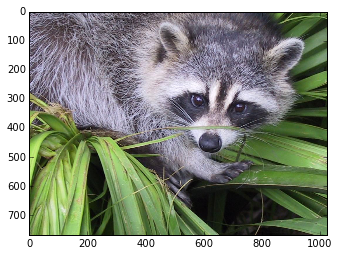

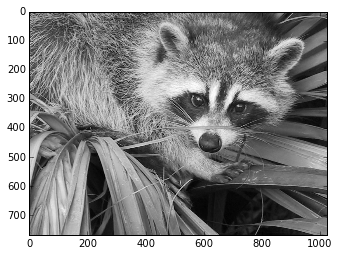

In [9]:
reload(task5)
data = (scipy.misc.face(), np.array([0.299, 0.587, 0.114]))
plt.imshow(data[0])
plt.show()
plt.gray()
plt.imshow(task5.vectorized(*data))
plt.show()

scipy.misc.imsave('./pics/color.png', data[0])
scipy.misc.imsave('./pics/gray.png', task5.vectorized(*data))

## Задача №6

In [14]:
run_experiment(task6)

Data #1: n=10000
Vectorized:
10000 loops, best of 3: 193 µs per loop
Non vectorized:
100 loops, best of 3: 12.2 ms per loop
Alternative:
100 loops, best of 3: 6.04 ms per loop
Error:  0
Equal:  True


Data #2: n=100000
Vectorized:
1000 loops, best of 3: 1.53 ms per loop
Non vectorized:
10 loops, best of 3: 146 ms per loop
Alternative:
10 loops, best of 3: 89.2 ms per loop
Error:  0
Equal:  True


Data #3: n=1000000
Vectorized:
100 loops, best of 3: 17.1 ms per loop
Non vectorized:
1 loops, best of 3: 1.43 s per loop
Alternative:
1 loops, best of 3: 911 ms per loop
Error:  0
Equal:  True




<IPython.core.display.Latex object>

## Задача №7

In [15]:
run_experiment(task7)

Data #1: n=20, m=30, d=10
Vectorized:
10000 loops, best of 3: 101 µs per loop
Scipy standart:
10000 loops, best of 3: 62.4 µs per loop
Alternative:
1000 loops, best of 3: 572 µs per loop
Error:  8.881784197e-16
Equal:  False


Data #2: n=400, m=400, d=2
Vectorized:
100 loops, best of 3: 10.9 ms per loop
Scipy standart:
100 loops, best of 3: 2.68 ms per loop
Alternative:
10 loops, best of 3: 19.7 ms per loop
Error:  0.0
Equal:  True


Data #3: n=100, m=100, d=10
Vectorized:
1000 loops, best of 3: 1.17 ms per loop
Scipy standart:
1000 loops, best of 3: 302 µs per loop
Alternative:
100 loops, best of 3: 3.57 ms per loop
Error:  8.881784197e-16
Equal:  False


Data #4: n=100, m=100, d=100
Vectorized:
100 loops, best of 3: 8.04 ms per loop
Scipy standart:
100 loops, best of 3: 2.26 ms per loop
Alternative:
100 loops, best of 3: 8.16 ms per loop
Error:  5.3290705182e-15
Equal:  False


Data #5: n=100, m=100, d=500
Vectorized:
10 loops, best of 3: 48 ms per loop
Scipy standart:
100 loops, bes

<IPython.core.display.Latex object>

## Задача №8

In [20]:
run_experiment(task8)

Data #1: n=100, d=10
Vectorized:
1000 loops, best of 3: 463 µs per loop
Scipy standart:
1000 loops, best of 3: 516 µs per loop
Alternative:
1000 loops, best of 3: 892 µs per loop
Error:  3.41060513165e-12
Equal:  False


Data #2: n=100, d=80
Vectorized:
100 loops, best of 3: 5.86 ms per loop
Scipy standart:
100 loops, best of 3: 5.74 ms per loop
Alternative:
100 loops, best of 3: 4.76 ms per loop
Error:  1.96678229258e-09
Equal:  False


Data #3: n=100, d=100
Vectorized:
100 loops, best of 3: 9.28 ms per loop
Scipy standart:
100 loops, best of 3: 9.05 ms per loop
Alternative:
100 loops, best of 3: 7.76 ms per loop
Error:  2.84290581476e-06
Equal:  False


Data #4: n=100, d=400
Vectorized:
1 loops, best of 3: 304 ms per loop
Scipy standart:
1 loops, best of 3: 257 ms per loop
Alternative:
1 loops, best of 3: 297 ms per loop
Error:  1.70989551407e-08
Equal:  False


Data #5: n=200, d=10
Vectorized:
1000 loops, best of 3: 1.41 ms per loop
Scipy standart:
1000 loops, best of 3: 569 µs per 

<IPython.core.display.Latex object>